## Introduction

This started as guided project for the intermidiate statistics course in Dataquest. The exercise gives student an imaginary challenge: as workers of an e-learning company providing training for web and mobile developers find the best market to advertise in. Other assumptions includes: the company will charge $59 for the course, and the data will come from freeCodeCamp's new coder survey. The publicly available data can be found in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

This project showcases my ability to load, manipulate, clean, and combine data using Pandas; create basic charts using Matplotlib; and calculate summary statistics. 

In [1]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

sns.set_style("white")
%matplotlib inline

In [2]:
# read the dataset into a dataframe
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(18175, 136)

## Background 

The survey asked 20,000 new coders encompassing information about themselves and their learning habits. The raw data provides information about country of origin, preferred learning platform, gender, attendance in live coding session, podcasts subscription, educational background, and future career plans of respondents. 

Extending on the premise of working for an e-learning company, using data from freeCodeCamp saves resources. Sure, a custom survey can provide greater detail, but it will require tremendous investment of time, manpower, and money. Moreover, since anyone can read freeCodeCamp we can assume that the survey results represents the population of new coders. 

This midsize dataset (13MB) contains 18715 rows, and 136 attributes. For the original article discussing the findings [click here](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). 

## The Challenge

The exercise can be broken down into answering the following questions:

- What are the future job interest of respondents? 
- Is there enough demand for web and mobile development course?
- Where are these future web and mobile developers residing?
- Can they pay our asking price?

## Job Interest

To gauge demand for the course, I took a look and explore the `JobRoleInterest` column. 

In [4]:
# explore the job role interest column
data['JobRoleInterest'].head(10)

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
5                                                  NaN
6                             Full-Stack Web Developer
7                                                  NaN
8                                                  NaN
9    Full-Stack Web Developer,   Quality Assurance ...
Name: JobRoleInterest, dtype: object

In [5]:
pd.DataFrame(data['JobRoleInterest'].head(10))

,JobRoleInterest
0,NaN
1,Full-Stack Web Developer
2,"Front-End Web Developer, Back-End Web Develo..."
3,"Front-End Web Developer, Full-Stack Web Deve..."
4,"Full-Stack Web Developer, Information Security..."
5,NaN
6,Full-Stack Web Developer
7,NaN
8,NaN
9,"Full-Stack Web Developer, Quality Assurance ..."


In [6]:
data.shape

(18175, 136)

## Ooops

This column contains multiple answers--a likely product of *check all that applies* instruction. In order to gain deeper insight on the column, I needed to do the following:

- Remove null values 
- Loop over each row
- Split on the `,` then turn the answer into a list
- Loop over the list
- Record interests for each job role in a dictionary
- Additionally, record the number of selected roles

In [7]:
# initialize an empty dict
job_interest_count = dict()
job_interests = dict()

no_nulls = data['JobRoleInterest'].dropna()

# loop over the (clean) column
for index, answer in enumerate(no_nulls):
    
    # view the column contents
    #print(index,answer)
    
    # convert the answer to string 
    answer = str(answer)
    
    # split the answers on using comma as the separator variable
    # store the answer in a list
    answer_list = [x.strip() for x in answer.split(',')]
     
    # loop over the answer_list
    for item in answer_list:
        
        # populate the dictionary
        if item in job_interests:
            job_interests[item] += 1
        else:
            job_interests[item] = 1
    
    # record the number of selected roles
    
    if len(answer_list) in job_interest_count:
        job_interest_count[len(answer_list)] += 1
    else:
        job_interest_count[len(answer_list)] = 1
    
    
    #print(answer_list)

In [8]:
# turn the job interest count dict to dataframe
job_interest_count_df = pd.DataFrame.from_dict(job_interest_count, orient = 'index')
job_interest_count_df.columns = ['count']
job_interest_count_df.sort_values(by=['count'], ascending = False, )

,count
1,2213
3,1111
4,1064
5,842
2,761
6,470
7,270
8,123
9,69
10,33


In [9]:
job_interest_df = pd.DataFrame.from_dict(job_interests, orient = 'index')
job_interest_df.columns = ['count']
job_interest_df = job_interest_df.sort_values(by=['count'], ascending = False, )
job_interest_df.head(10)

,count
Full-Stack Web Developer,4198
Front-End Web Developer,3533
Back-End Web Developer,2772
Mobile Developer,2304
Data Scientist,1643
Game Developer,1628
User Experience Designer,1469
Information Security,1326
Data Engineer,1248
DevOps / SysAdmin,927


In [10]:
no_nulls.shape[0]/data.shape[0]

0.38470426409903713

In [11]:
# get a freqeuncy table for the number of job interests each respondents entered
job_interest_count_df * 100 / job_interest_count_df.sum()

,count
1,31.650458
5,12.042334
3,15.889588
6,6.721968
4,15.217391
2,10.883867
12,0.300343
7,3.861556
8,1.759153
10,0.471968


In [12]:
# turn the job interest dictionary into a dataframe
job_interest = pd.DataFrame.from_dict(job_interests, orient = 'index')
job_interest.columns = ['number']

In [13]:
# sort the dataframe to show the most common answers
job_interest.sort_values(by=['number'], ascending = False, inplace = True)
job_interest.head(10)

,number
Full-Stack Web Developer,4198
Front-End Web Developer,3533
Back-End Web Developer,2772
Mobile Developer,2304
Data Scientist,1643
Game Developer,1628
User Experience Designer,1469
Information Security,1326
Data Engineer,1248
DevOps / SysAdmin,927


In [14]:
# show the percentage of respondents that show interest in different fields
# since multiple answers can be given, this will not total to 100%
job_interest['number'] * 100 / no_nulls.shape[0]

Full-Stack Web Developer                                                                           60.040046
Front-End Web Developer                                                                            50.529176
Back-End Web Developer                                                                             39.645309
Mobile Developer                                                                                   32.951945
Data Scientist                                                                                     23.498284
Game Developer                                                                                     23.283753
User Experience Designer                                                                           21.009725
Information Security                                                                               18.964531
Data Engineer                                                                                      17.848970
DevOps / SysAdmin  

In [15]:
# compute the percentage of respondents who provided no answer
data['JobRoleInterest'].isnull().sum() * 100/data.shape[0]

61.529573590096284

In [16]:
# determine the percentage interested in web and/or mobile developer
web_and_mobile = no_nulls.str.contains('Web Developer|Mobile Developer')
web_and_mobile.sum() * 100 /len(no_nulls)

86.24141876430205

In [17]:
data_interest = no_nulls.str.contains('Data')
data_interest.sum() * 100 / len(no_nulls)

29.676773455377575

## Job interest

Surprisingly, 61.53% of respondents did not answer when asked about their preferred future job role. Of those who did answer, only 31% provided a single answer  (they probably knew what they want to do). Overwhelmingly (86.24%), indicated their interest in web and/or mobile development. In fact, the top 4 future job interests all involves web/mobile developent. Comparatively, only 29% of respondents indicated their interest for data science. 

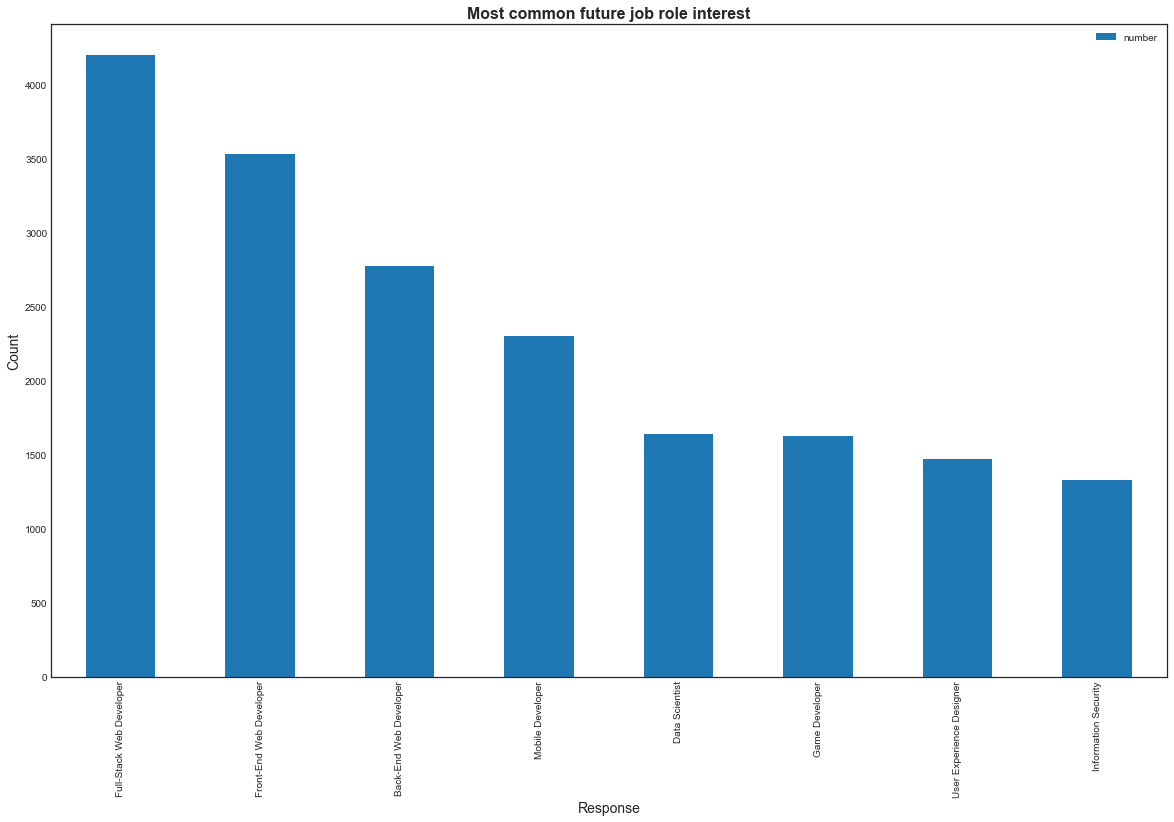

In [18]:
# create a bar plot showing the top answers
job_interest[0:8].plot.bar(figsize=(20,12))
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Response', fontsize = 14)
plt.title('Most common future job role interest', fontsize = 16, fontweight = 'bold')
plt.savefig('job_interest.png')
plt.show()


## Market

Obviously, an ad campaign must run on areas where customers reside. To do that, we explore the `CountryLive` column. For this part, I only included those participants that provided info on the job role interest question to ensure representative samples.

In [19]:
# select rows where job role interest is not null
cleaned_data = data[data['JobRoleInterest'].notnull()].copy()
cleaned_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,6839.000000,6894.000000,360.000000,365.000000,365.000000,938.000000,460.0,54.0,733.0,94.0,...,477.0,2565.0,453.0,1150.0,1079.0,485.0,1313.0,174.0,72.0,1143.0
mean,27.413803,0.053815,0.483333,0.320548,0.786301,1.825160,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.537008,0.225668,0.500418,0.467328,0.410479,0.927078,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,71.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
# determine where most respondents live
countries_most = cleaned_data['CountryLive'].value_counts()
countries_most.sort_values(inplace = True, ascending = False)

In [21]:
# normalize data
normalized_countries = (countries_most * 100) / countries_most.sum()
pd.DataFrame(normalized_countries[:20]).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>CountryLive</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>United States of America</th>\n      <td>45.700497</td>\n    </tr>\n    <tr>\n      <th>India</th>\n      <td>7.721556</td>\n    </tr>\n    <tr>\n      <th>United Kingdom</th>\n      <td>4.606610</td>\n    </tr>\n    <tr>\n      <th>Canada</th>\n      <td>3.802281</td>\n    </tr>\n    <tr>\n      <th>Poland</th>\n      <td>1.915765</td>\n    </tr>\n    <tr>\n      <th>Brazil</th>\n      <td>1.886517</td>\n    </tr>\n    <tr>\n      <th>Germany</th>\n      <td>1.828020</td>\n    </tr>\n    <tr>\n      <th>Australia</th>\n      <td>1.637906</td>\n    </tr>\n    <tr>\n      <th>Russia</th>\n      <td>1.491664</td>\n    </tr>\n    <tr>\n      <th>Ukraine</th>\n      <td>1.301550</td>\n    </tr>\n    <tr>\n      <th>Nigeria</th>\n      <td>1.228429</td>\n    </tr>\n    <tr>\n      <th>Spain</th>\n      <td>1

## Targets

US, India, UK, Canada, and Brazil compose the five largest markets this ad campaign can focus on. Interestingly, only the Philippines cracked the top 20 from South East Asia.

## Money spent

The amount of money each respondent spends for learning signifies their willingness, and ability to pay the subscription rate for the training ($59 per month). Moreover, since US, UK, India, and Canada comprise nearly half of the respondent (47%) the ad campaign can be targeted to those four markets.  

In [22]:
# divide the money for learning column and the months spent programming
# to define a new column called MoneySpentMonthly 
# however, replace first 0 values to 1 in the MonthsProgramming column
# to avoid dividing by zero

cleaned_data['MonthsProgramming'].replace(0,1, inplace = True)

# check that the minimum value is now 1
cleaned_data['MonthsProgramming'].describe()

count    6633.000000
mean       13.681140
std        29.586196
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [23]:
# create a new column that shows the money spent per month of each respondent
cleaned_data['MoneySpentMonthly'] = cleaned_data['MoneyForLearning'] / cleaned_data['MonthsProgramming']


In [24]:
# group by country and select the money spent per month column
data_grouped = cleaned_data.groupby(by = ['CountryLive']).mean()
willingness_to_pay = data_grouped.loc[['United States of America', 'India', 'United Kingdom','Canada'],['MoneySpentMonthly']]

In [25]:
willingness_to_pay

,MoneySpentMonthly
CountryLive,
United States of America,227.997996
India,135.100982
United Kingdom,45.534443
Canada,113.510961


In [26]:
willingness_to_pay.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>MoneySpentMonthly</th>\n    </tr>\n    <tr>\n      <th>CountryLive</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>United States of America</th>\n      <td>227.997996</td>\n    </tr>\n    <tr>\n      <th>India</th>\n      <td>135.100982</td>\n    </tr>\n    <tr>\n      <th>United Kingdom</th>\n      <td>45.534443</td>\n    </tr>\n    <tr>\n      <th>Canada</th>\n      <td>113.510961</td>\n    </tr>\n  </tbody>\n</table>'

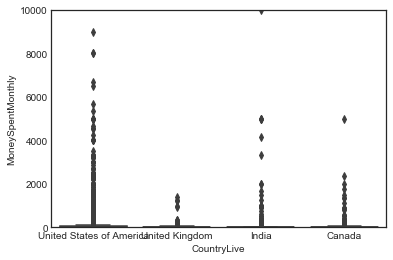

In [27]:
# select the top 4
top_4 = cleaned_data[cleaned_data['CountryLive'].isin(['United States of America', 'India', 'United Kingdom','Canada'])]

sns.boxplot(x='CountryLive', y='MoneySpentMonthly', data = top_4)
plt.ylim(0,10000)
plt.show()

## Interpretation

Expectedly, American citizens spends the most per month on online learning platforms. Surprisingly, India came in second, and outspends UK and Canada. Factor in the higher relative cost of online education in India, and it can be concluded that the Indian market is lucrative. 

## Additional Analysis

Wanting to dig deep, I obtained the country data for the Philippines, and for the rest of the world.

In [28]:
philippines = data[data['CountryLive'] == 'Philippines']
philippines.shape

(135, 136)

In [29]:
rest = data[data['CountryLive'] != 'Philippines']
rest.shape

(18040, 136)

In [30]:
philippines['AttendedBootcamp'].mean()

0.05263157894736842

In [31]:
philippines['Age'].mean()

25.253731343283583

In [32]:
rest['Age'].mean()

27.713319766296856

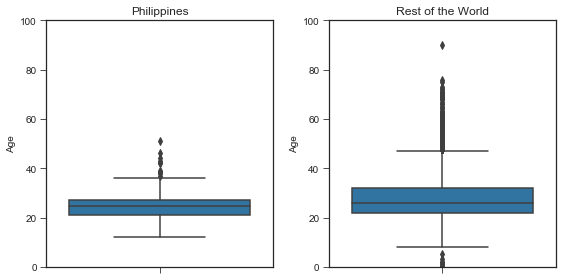

In [33]:
# create a boxplot comparing the age of learners in the philippines vs. rest of the world

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=philippines['Age'])
plt.ylim(0,100)
plt.title('Philippines')

plt.subplot(1,2,2)
sns.boxplot(y=data['Age'])
plt.ylim(0,100)
plt.title('Rest of the World')

plt.tight_layout()
plt.savefig('philippines_rest_age.png')
plt.show()

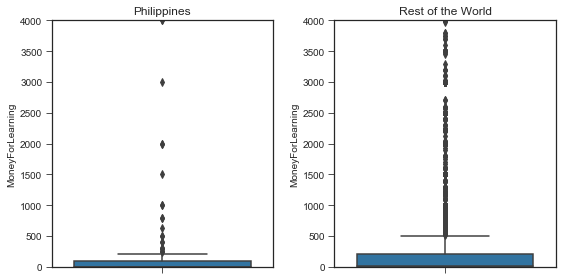

In [34]:
# create a boxplot comparing the money spent in the philippines vs. rest of the world

sns.set_style('ticks')
fig, ax= plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 4)

plt.subplot(1,2,1)
sns.boxplot( y=philippines['MoneyForLearning'])
plt.ylim(0,4000)
plt.title('Philippines')

plt.subplot(1,2,2)
sns.boxplot(y=data['MoneyForLearning'])
plt.ylim(0,4000)
plt.title('Rest of the World')

plt.tight_layout()
plt.savefig('philippines_rest_money.png')
plt.show()

In [87]:
philippines['MoneyForLearning'].mean()

224.359649122807

In [89]:
rest['MoneyForLearning'].mean()

962.375083520622

## Comparing Job Interest

In [35]:
def job_roles(data):
    # initialize an empty dict
    job_interest_count = dict()
    job_interests = dict()

    no_nulls = data['JobRoleInterest'].dropna()

    # loop over the (clean) column
    for index, answer in enumerate(no_nulls):

        # view the column contents
        #print(index,answer)

        # convert the answer to string 
        answer = str(answer)

        # split the answers on using comma as the separator variable
        # store the answer in a list
        answer_list = [x.strip() for x in answer.split(',')]

        # loop over the answer_list
        for item in answer_list:

            # populate the dictionary
            if item in job_interests:
                job_interests[item] += 1
            else:
                job_interests[item] = 1

        # record the number of selected roles

        if len(answer_list) in job_interest_count:
            job_interest_count[len(answer_list)] += 1
        else:
            job_interest_count[len(answer_list)] = 1
    
    return job_interest_count, job_interests

job_interest_count_phil, job_interest_phil = job_roles(philippines)
job_interest_count_rest, job_interest_rest = job_roles(rest)

In [36]:
job_interest_count_phil

{4: 13, 3: 8, 1: 14, 6: 5, 8: 1, 10: 2, 5: 5, 12: 2, 2: 1, 7: 1}

In [77]:
job_interest_phil_df = pd.DataFrame.from_dict(job_interest_phil, orient = 'index')
job_interest_phil_df.columns = ['number']
job_interest_phil_df.sort_values(by=['number'],ascending=False,inplace=True)
job_interest_phil_df

,number
Full-Stack Web Developer,31
Back-End Web Developer,30
Front-End Web Developer,27
Mobile Developer,21
Game Developer,18
Information Security,15
User Experience Designer,14
Data Scientist,13
Data Engineer,12
Quality Assurance Engineer,10


In [45]:
job_interest_rest_df = pd.DataFrame.from_dict(job_interest_rest, orient = 'index')
job_interest_rest_df.columns = ['number']
job_interest_rest_df.sort_values(by=['number'],ascending=False,inplace=True)
job_interest_rest_df

,number
Full-Stack Web Developer,4167
Front-End Web Developer,3506
Back-End Web Developer,2742
Mobile Developer,2283
Data Scientist,1630
Game Developer,1610
User Experience Designer,1455
Information Security,1311
Data Engineer,1236
DevOps / SysAdmin,918


There are less rows in the Philippines than in the rest of the world. To compare, I need to make it the same. 

In [55]:
rest_data = job_interest_rest_df.loc[job_interest_phil_df.index] * 100 / rest.shape[0]

In [54]:
phil_data = job_interest_phil_df * 100 / philippines.shape[0]

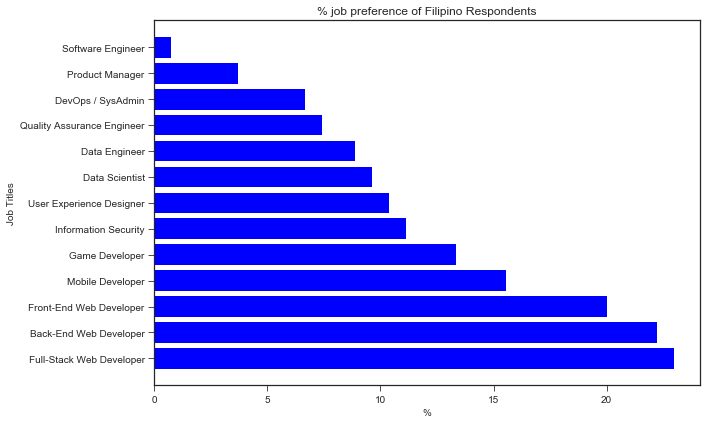

In [86]:
fig, ax= plt.subplots()
fig.set_size_inches(10, 6)

height = phil_data['number']
bars = phil_data.index
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, color = 'blue')
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.title('% job preference of Filipino Respondents')
plt.xlabel('%')
plt.ylabel('Job Titles')
#plt.legend()
plt.tight_layout()
plt.savefig('job_preference_phil.png')
plt.show()


In [56]:
rest_data

,number
Full-Stack Web Developer,23.098670
Back-End Web Developer,15.199557
Front-End Web Developer,19.434590
Mobile Developer,12.655211
Game Developer,8.924612
Information Security,7.267184
User Experience Designer,8.065410
Data Scientist,9.035477
Data Engineer,6.851441
Quality Assurance Engineer,2.705100


In [64]:
list(phil_data.index)

['Full-Stack Web Developer',
 'Back-End Web Developer',
 'Front-End Web Developer',
 'Mobile Developer',
 'Game Developer',
 'Information Security',
 'User Experience Designer',
 'Data Scientist',
 'Data Engineer',
 'Quality Assurance Engineer',
 'DevOps / SysAdmin',
 'Product Manager',
 'Software Engineer']

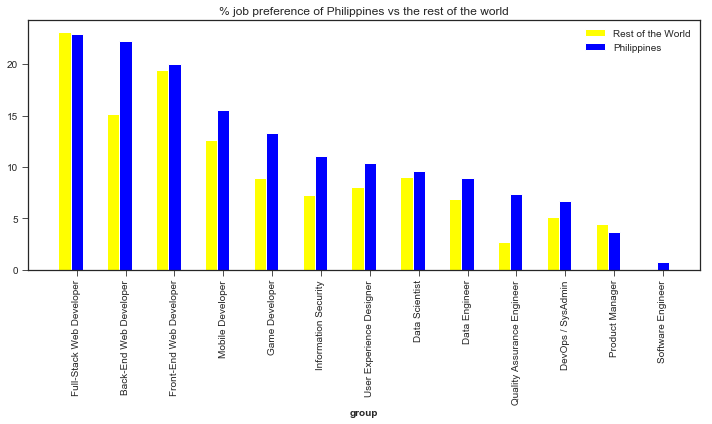

In [76]:
fig, ax= plt.subplots()
fig.set_size_inches(10, 6)

barWidth = 0.25
 
# set height of bar
bars1 = rest_data['number']
bars2 = phil_data['number']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='yellow', width=barWidth, edgecolor='white', label='Rest of the World')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Philippines')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(phil_data.index), rotation = 90)
 
# Create legend & Show graphic
plt.title('% job preference of Philippines vs the rest of the world')
plt.legend()
plt.tight_layout()
plt.savefig('job_preference.png')
plt.show()


In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.barplot(x = job_interest_phil_df.index, y= 'number' , data=job_interest_phil_df)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Future Job Interest Philippines', fontsize=18)
plt.tight_layout()
plt.savefig('job_interest_phil.png')
plt.show()

In [ ]:
job_roles = job_interest_phil_df['number'] *100 / philippines.shape[0]
job_roles.sort_values(ascending=False)

## Additional Analysis

The data from the survey shows that majority of online learners in the country wants a role in web and mobile development. Interestingly, only 25% of the respondent wants a career in data science. 

## Conclusion

The United States still leads the world in IT. The number of people taking online courses, and the average amount they spend each month indicates a passion and dedication for learning, that only India can rival at this point. A further analysis of the data shows that the Philippines lags the world in the raw number of people that enrolls in online courses.

This exercise reinforces basic skills in data manipulation, statistical analysis, and visualization.
